# Credit Card Approval

* Data Source: [Kaggle - Credit Card Approval (Clean version)](https://www.kaggle.com/code/salsabilanmahmudah/cca-ann)
* Author: Huu Phuc (Felix) Hong
* Last Update: 10 November, 2023

# Data Import

In [1]:
# Library for analysis and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Library for modelling and scoring performance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Import dataset
df_process = pd.read_csv('cc_approvals_processed.csv')

# Function Declaration

In [3]:
# Function declaration for plotting confusion matrix after modelling
def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not approved', 'Approved']); ax.yaxis.set_ticklabels(['Not approved', 'Approved']) 
    plt.show() 

# Modelling

In [4]:
# Create input feature and target feature
X = df_process.drop(["Approved"], axis=1)
y = df_process["Approved"]

In [5]:
# Train-test split with 20% of data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

### RandomForest

#### Modelling

In [6]:
# Create parameters for GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

# Create GridSearchCV
rf_classifier_cv = GridSearchCV(estimator=rf_classifier, param_grid=parameters, cv=5, error_score='raise', scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
rf_classifier_cv.fit(X_train, y_train)
print("Best parameters: ", rf_classifier_cv.best_params_)

# Cross validation for avoiding overfitting
cross_val_scores = cross_val_score(rf_classifier_cv, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)

# Predict target in test data 
yhat=rf_classifier_cv.predict(X_test)

Best parameters:  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
Cross-Validation Scores: [0.9009009  0.83783784 0.89090909 0.83636364 0.82727273]


#### Plot Tree

In [ ]:
plt.figure(figsize=(120, 110))
plot_tree(
    rf_classifier_cv.best_estimator_.estimators_[0],
    filled=True,
    feature_names=X_train.columns.tolist(),
    class_names=["Not Approved", "Approved"],
    fontsize=10
)
plt.show()

#### Confusion Matrix

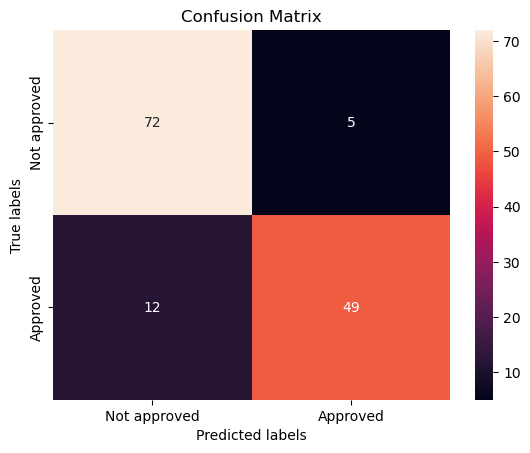

In [8]:
plot_confusion_matrix(y_test,yhat)

#### Accuracy Report

In [9]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.94      0.89        77
           1       0.91      0.80      0.85        61

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



In [10]:
accuracy_rf_cv = accuracy_score(y_test, yhat)

### Logistic Regression

#### Modelling

In [11]:
# Standardize data
X = StandardScaler().fit_transform(X)

In [12]:
# Re split data to train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create parameters for GridSearchCV
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}

# Create the LogisticRegression
lr=LogisticRegression()

# Create the GridSearchCV
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit GridSearchCV to find the best hyperparameters
logreg_cv.fit(X_train, y_train)
print("Best parameters: ", logreg_cv.best_params_)

# Cross validation for avoiding overfitting
cross_val_scores = cross_val_score(logreg_cv, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)

# Predict target of test set
yhat=logreg_cv.predict(X_test)

Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-Validation Scores: [0.9009009  0.84684685 0.9        0.83636364 0.86363636]


#### Confusion Matrix

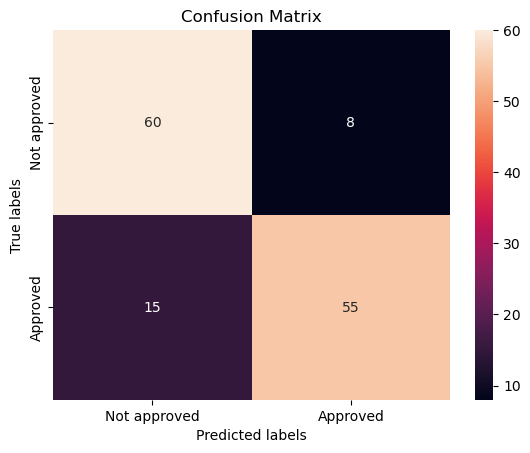

In [14]:
plot_confusion_matrix(y_test,yhat)

#### Accuracy Report

In [15]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        68
           1       0.87      0.79      0.83        70

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138



In [16]:
accuracy_logreg_cv = accuracy_score(y_test, yhat)

### K Nearest Neghibors

#### Modelling

In [17]:
# Create parameters for GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNeighborsClassifier
knn = KNeighborsClassifier()

# Create GridSearchCV
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, error_score='raise')

# Fit GridSearchCV to find the best hyperparameters
knn_cv.fit(X_train, y_train)
print("Best parameters: ", knn_cv.best_params_)

# Cross validation for avoiding overfitting
cross_val_scores = cross_val_score(knn_cv, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)

# Predict target of test set
yhat=knn_cv.predict(X_test)

Best parameters:  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1}
Cross-Validation Scores: [0.8018018  0.75675676 0.80909091 0.78181818 0.85454545]


#### Confusion Matrix

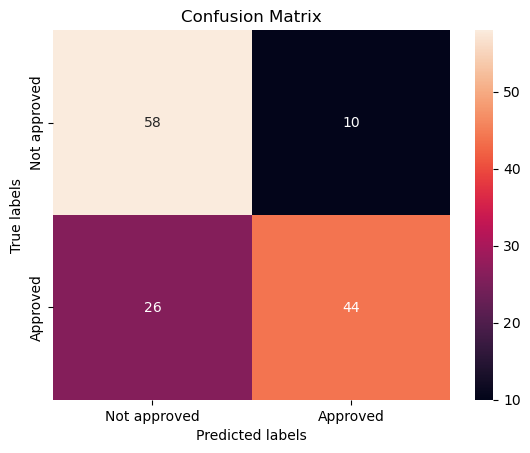

In [18]:
plot_confusion_matrix(y_test,yhat)

#### Accuracy Report

In [19]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        68
           1       0.81      0.63      0.71        70

    accuracy                           0.74       138
   macro avg       0.75      0.74      0.74       138
weighted avg       0.75      0.74      0.74       138



In [20]:
accuracy_knn_cv = accuracy_score(y_test, yhat)

### Summary

From the report below, among 3 models, using Random Forest Classifier performed best in this dataset

In [45]:
report = pd.DataFrame({"Model":["RF Classifier", "LR", "KNN"],
                       "Accuracy (%)": [round(accuracy_rf_cv,2), round(accuracy_logreg_cv,2), round(accuracy_knn_cv,2)]})
report

,Model,Accuracy (%)
0,RF Classifier,0.88
1,LR,0.83
2,KNN,0.74
